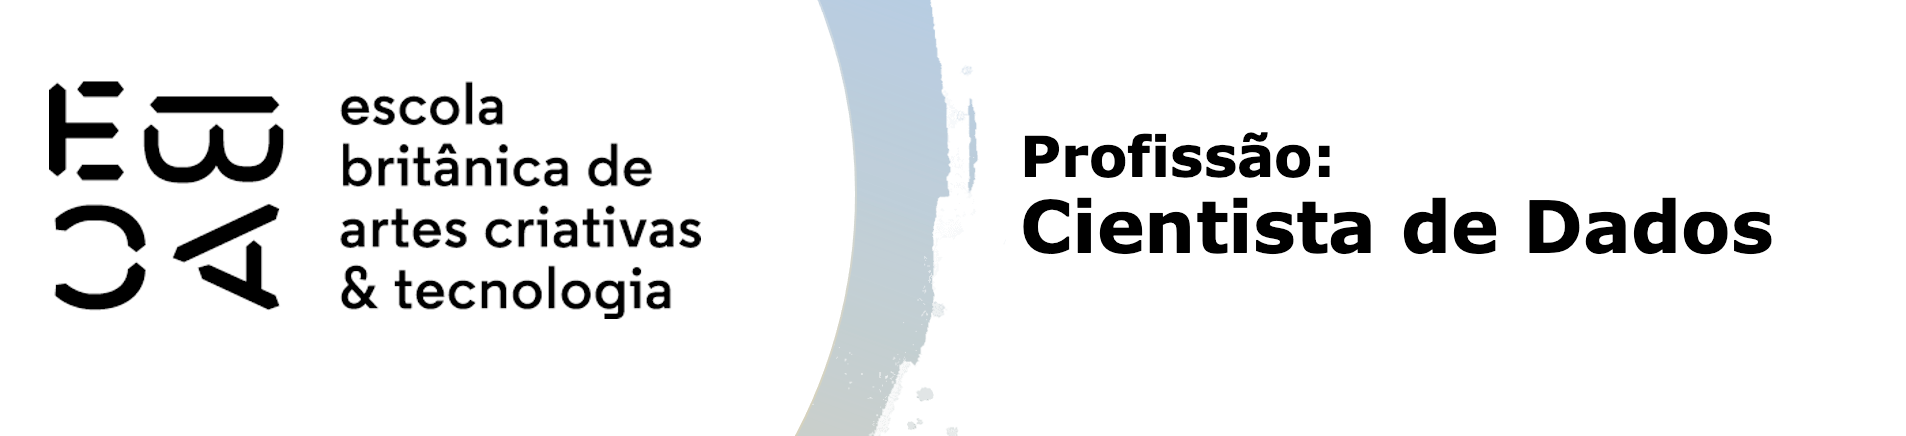

# Regressão III - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          624240 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


In [4]:
df[df['tempo_emprego'].isna()].head(5)

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,11433,M,S,S,0,Pensionista,Superior completo,Casado,Casa,56,NaN,2.0,1847.48
2015-01-01,14570,F,S,S,0,Pensionista,Superior completo,Solteiro,Casa,50,NaN,1.0,7806.22
2015-01-01,3648,F,N,N,0,Pensionista,Superior completo,Casado,Casa,66,NaN,2.0,2903.39
2015-01-01,8242,F,N,S,0,Pensionista,Médio,Viúvo,Governamental,61,NaN,1.0,2096.69
2015-01-01,3026,F,N,S,0,Pensionista,Médio,Viúvo,Casa,55,NaN,1.0,7940.03


In [5]:
df[~df['tempo_emprego'].isna()].head(5)

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [3]:
mean_temp_empreg = df['tempo_emprego'].mean()

In [4]:
df['tempo_emprego'] = df['tempo_emprego'].fillna(mean_temp_empreg)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          750000 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [6]:
df = df.reset_index()
df['data_ref'].value_counts()

2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: data_ref, dtype: int64

In [13]:
df_train = df.loc[df['data_ref'] <= '2015-12-01']
df_test = df.loc[df['data_ref'] > '2015-12-01']

In [8]:
print(df_train.shape)
print(df_test.shape)
print(df.shape)

(600000, 14)
(150000, 14)
(750000, 14)


### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [9]:
df_train.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda'],
      dtype='object')

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 0 to 599999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_ref               600000 non-null  object 
 1   index                  600000 non-null  int64  
 2   sexo                   600000 non-null  object 
 3   posse_de_veiculo       600000 non-null  object 
 4   posse_de_imovel        600000 non-null  object 
 5   qtd_filhos             600000 non-null  int64  
 6   tipo_renda             600000 non-null  object 
 7   educacao               600000 non-null  object 
 8   estado_civil           600000 non-null  object 
 9   tipo_residencia        600000 non-null  object 
 10  idade                  600000 non-null  int64  
 11  tempo_emprego          600000 non-null  float64
 12  qt_pessoas_residencia  600000 non-null  float64
 13  renda                  600000 non-null  float64
dtypes: float64(3), int64(3), object(8)
m

In [11]:
res = smf.ols('''renda ~ posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego+
       qt_pessoas_residencia + C(sexo) + C(tipo_renda) + C(educacao) + C(estado_civil)+
        C(tipo_residencia)''', data = df_train).fit()

print(res.rsquared_adj)
res.summary()


0.24499654786238467


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     8113.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:10:51   Log-Likelihood:            -7.6744e+06
No. Observations:              600000   AIC:                         1.535e+07
Df Residuals:                  599975   BIC:                         1.535e+07
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -4.335e+04   4527.299     -9.574      0.000   -5.22e+04   -3.45e+04
posse_de_veiculo[T.S]               -1186.8729    251.890     -4.712      0.000   -1680.570    -693.176
posse_de_imovel[T.S]                 6569.4618    246.391     26.663      0.000    6086.543    7052.380
C(sexo)[T.M]                        -3021.9626    264.887    -11.408      0.000   -3541.134   -2502.792
C(tipo_renda)[T.Bolsista]           -4.039e+04   4982.296     -8.107      0.000   -5.02e+04   -3.06e+04
C(tipo_renda)[T.Empresário]          2565.3828    284.273      9.024      0.000    2008.218    3122.548
C(tipo_renda)[T.Pensionista]        -2.522e+04    405.282    -62.234      0.000    -2.6e+04   -2.44e+04
C(tipo_renda)[T.Servidor público]    -661.6150    418.401     -1.581      0.114   -1481.667     158.437
C(educacao)[T.Médio]                -3749.1941   1063.756     -3.524      0.000   -5834.121   -1664.267
C(educacao)[T.Pós graduação]         7769.8817   3621.946      2.145      0.032     670.984    1.49e+04
C(educacao)[T.Superior completo]      140.8267   1075.127      0.131      0.896   -1966.389    2248.042
C(educacao)[T.Superior incompleto]   4990.4441   1202.838      4.149      0.000    2632.920    7347.968
C(estado_civil)[T.Separado]          1379.6101   2185.265      0.631      0.528   -2903.439    5662.660
C(estado_civil)[T.Solteiro]          1.038e+04   2144.102      4.843      0.000    6181.259    1.46e+04
C(estado_civil)[T.União]             1253.6546    428.306      2.927      0.003     414.189    2093.121
C(estado_civil)[T.Viúvo]             -911.7850   2208.826     -0.413      0.680   -5241.013    3417.443
C(tipo_residencia)[T.Casa]          -2202.6818    967.575     -2.276      0.023   -4099.097    -306.267
C(tipo_residencia)[T.Com os pais]    2252.6142   1096.337      2.055      0.040     103.830    4401.399
C(tipo_residencia)[T.Comunitário]    2813.1417   1951.886      1.441      0.150   -1012.491    6638.775
C(tipo_residencia)[T.Estúdio]       -5943.2649   1630.657     -3.645      0.000   -9139.300   -2747.230
C(tipo_residencia)[T.Governamental] -6141.0097   1151.562     -5.333      0.000   -8398.033   -3883.986
qtd_filhos                          -1112.8301   2134.446     -0.521      0.602   -5296.277    3070.616
idade                                 333.3160     14.694     22.684      0.000     304.517     362.115
tempo_emprego                        7826.5637     19.771    395.868      0.000    7787.814    7865.314
qt_pessoas_residencia                 105.3327   2129.918      0.049      0.961   -4069.238    4279.903
==============================================================================
Omnibus:                  1429260.216   Durbin-Watson:                   1.946
Prob(Omnibus)

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [10]:
df['cat_tempo_emprego'], quebras = pd.qcut(df.tempo_emprego, 20, duplicates='drop', 
                        retbins=True)
df['log_renda'] = np.log(df['renda'])

In [13]:
df.head(5)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,cat_tempo_emprego,log_renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,"(15.216, 20.216]",9.318131
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,"(9.093, 10.438]",7.793508
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,"(8.107, 9.093]",9.528769
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,"(0.816, 1.458]",7.767196
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,"(0.816, 1.458]",6.673020


In [14]:
t_emp = pd.DataFrame()
t_emp['qtd_observações'] = df[['cat_tempo_emprego']].value_counts()
t_emp = t_emp.reset_index()
t_emp = t_emp.sort_values('cat_tempo_emprego')
t_emp = t_emp.set_index('cat_tempo_emprego')

t_emp1 = pd.DataFrame()
t_emp1['média_log_renda'] = df.groupby('cat_tempo_emprego')['log_renda'].mean()


t_emp2 = pd.DataFrame()
t_emp2['média_tempo_emprego'] = df.groupby('cat_tempo_emprego')['tempo_emprego'].mean()
t_emp2

t_emp3 = pd.concat([t_emp, t_emp1, t_emp2], axis=1)
t_emp3

,qtd_observações,média_log_renda,média_tempo_emprego
cat_tempo_emprego,,,
"(0.11699999999999999, 0.816]",37699,8.134693,0.515096
"(0.816, 1.458]",37522,8.215925,1.124770
"(1.458, 2.099]",37437,8.335011,1.783247
"(2.099, 2.912]",37391,8.390223,2.513020
"(2.912, 3.636]",37915,8.522387,3.300942
"(3.636, 4.301]",37253,8.612289,3.989239
"(4.301, 4.934]",37401,8.673718,4.613535
"(4.934, 5.759]",37545,8.809638,5.367816
"(5.759, 6.622]",37495,8.905467,6.205161


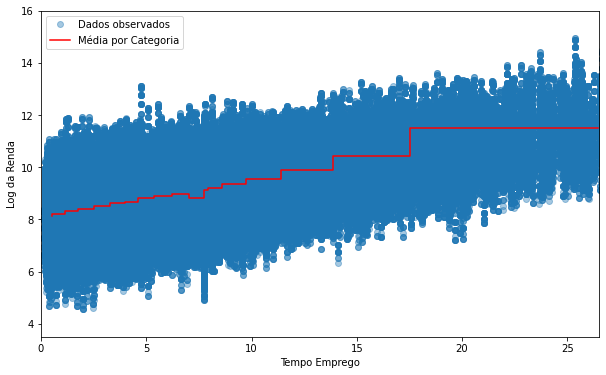

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.axis([0,26.5, 3.5, 16])
ax.plot(df.tempo_emprego, df.log_renda, "o", label="Dados observados", alpha=.4 )
ax.step(t_emp3.média_tempo_emprego, t_emp3.média_log_renda, "-r", label="Média por Categoria",
        alpha=1)
ax.set_xlabel('Tempo Emprego')
ax.set_ylabel('Log da Renda')

ax.legend()


In [16]:
quebras

array([ 0.11780822,  0.81643836,  1.45753425,  2.09863014,  2.91232877,
        3.63561644,  4.30136986,  4.93424658,  5.75890411,  6.62191781,
        7.47123288,  7.7461648 ,  8.10684932,  9.09315068, 10.43835616,
       12.4739726 , 15.21643836, 20.21643836, 42.90684932])

Verifica-se que muitas médias por categorias estão muito próximas, o que possibilita a sua juntação, desta forma diminuindo o número de categoricas da variável Tempo Emprego.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


Text(0, 0.5, 'Log da Renda')

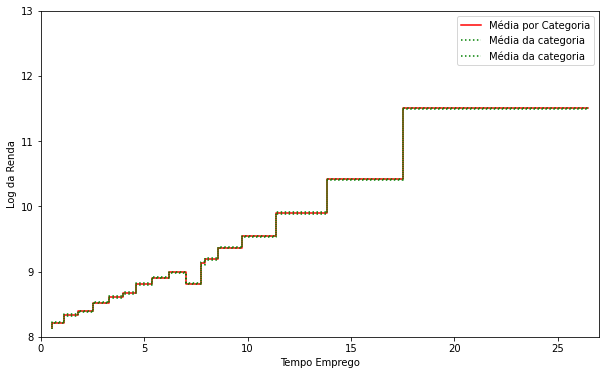

In [17]:

t_emp3['Logrenda_min'] = t_emp3.média_log_renda - 2*df.groupby('cat_tempo_emprego')['log_renda'].sem()
t_emp3['Logrenda_max'] = t_emp3.média_log_renda + 2*df.groupby('cat_tempo_emprego')['log_renda'].sem()

fig, ax = plt.subplots(figsize=(10, 6))
plt.axis([0,27, 8, 13])

ax.step(t_emp3.média_tempo_emprego, t_emp3.média_log_renda, "-r", label="Média por Categoria",
        alpha=1)
ax.step(t_emp3.média_tempo_emprego, t_emp3.Logrenda_min, "g:", label="Média da categoria", alpha=1)
ax.step(t_emp3.média_tempo_emprego, t_emp3.Logrenda_max, "g:", label="Média da categoria", alpha=1)
ax.legend()
ax.set_xlabel('Tempo Emprego')
ax.set_ylabel('Log da Renda')


In [20]:
res_quebras = smf.ols('''log_renda ~ posse_de_veiculo + posse_de_imovel + qtd_filhos + idade +
    cat_tempo_emprego + qt_pessoas_residencia + C(sexo) + C(tipo_renda) + C(educacao) +
    C(estado_civil) + C(tipo_residencia)''', data = df_train).fit()

print(res_quebras.rsquared_adj)
res_quebras.summary()

0.42686064376579425


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                 1.117e+04
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:11:59   Log-Likelihood:            -8.0323e+05
No. Observations:              600000   AIC:                         1.607e+06
Df Residuals:                  599959   BIC:                         1.607e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         7.6544      0.049    157.801      0.000       7.559       7.749
posse_de_veiculo[T.S]                                             0.0087      0.003      3.252      0.001       0.003       0.014
posse_de_imovel[T.S]                                              0.1776      0.003     67.679      0.000       0.172       0.183
cat_tempo_emprego[T.Interval(0.816, 1.458, closed='right')]       0.0717      0.008      9.501      0.000       0.057       0.087
cat_tempo_emprego[T.Interval(1.458, 2.099, closed='right')]       0.1882      0.008     24.914      0.000       0.173       0.203
cat_tempo_emprego[T.Interval(2.099, 2.912, closed='right')]       0.2399      0.008     31.791      0.000       0.225       0.255
cat_tempo_emprego[T.Interval(2.912, 3.636, closed='right')]       0.3759      0.008     49.994      0.000       0.361       0.391
cat_tempo_emprego[T.Interval(3.636, 4.301, closed='right')]       0.4610      0.008     61.025      0.000       0.446       0.476
cat_tempo_emprego[T.Interval(4.301, 4.934, closed='right')]       0.5346      0.008     70.856      0.000       0.520       0.549
cat_tempo_emprego[T.Interval(4.934, 5.759, closed='right')]       0.6796      0.008     90.179      0.000       0.665       0.694
cat_tempo_emprego[T.Interval(5.759, 6.622, closed='right')]       0.7582      0.008    100.482      0.000       0.743       0.773
cat_tempo_emprego[T.Interval(6.622, 7.471, closed='right')]       0.8420      0.008    111.391      0.000       0.827       0.857
cat_tempo_emprego[T.Interval(7.471, 7.746, closed='right')]       0.9183      0.011     82.139      0.000       0.896       0.940
cat_tempo_emprego[T.Interval(7.746, 8.107, closed='right')]       0.9896      0.010     95.059      0.000       0.969       1.010
cat_tempo_emprego[T.Interval(8.107, 9.093, closed='right')]       1.0503      0.008    139.244      0.000       1.036       1.065
cat_tempo_emprego[T.Interval(9.093, 10.438, closed='right')]      1.2205      0.008    161.174      0.000       1.206       1.235
cat_tempo_emprego[T.Interval(10.438, 12.474, closed='right')]     1.3843      0.008    182.063      0.000       1.369       1.399
cat_tempo_emprego[T.Interval(12.474, 15.216, closed='right')]     1.7463      0.008    229.892      0.000       1.731       1.761
cat_tempo_emprego[T.Interval(15.216, 20.216, closed='right')]     2.2674      0.008    297.288      0.000       2.252       2.282
cat_tempo_emprego[T.Interval(20.216, 42.907, closed='right')]     3.3270      0.008    427.280      0.000       3.312       3.342
C(sexo)[T.M]                                                      0.1307      0.003     46.39

In [21]:
df_ajuste_rsquared = pd.DataFrame()
df_ajuste_rsquared['pred_y']= np.exp(res_quebras.fittedvalues)
df_ajuste_rsquared['y'] = df_train['log_renda']
df_ajuste_rsquared[['pred_y', 'y']].corr().iloc[0,1]**2



0.3286892139706292

O primeiro modelo (y ~ X(sendo todas variáveis)) apresentou R-quadrado de 0,245, já o modelo segundo modelo com a categorização da variável tempo de emprego (log_y ~ X(todas variáveis sendo o tempo de emprego categorizado em 20 quartis) apresentou R_quadrado de 0,3286, demonstrando ser um modelo melhor. 

Text(0, 0.5, 'Log da Renda')

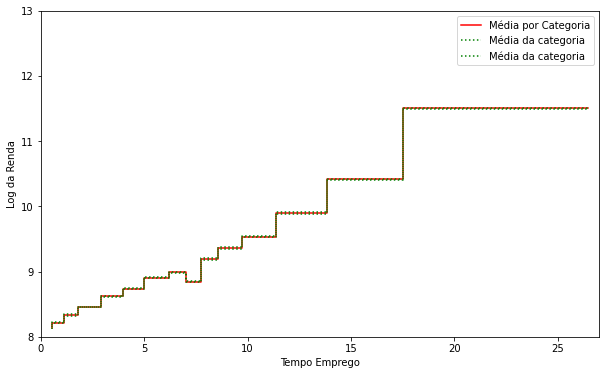

In [11]:

quebras2=[0.11780822,  0.81643836, 1.45753425, 2.09863014, 3.63561644,4.30136986,
         5.75890411, 6.62191781, 7.47123288,  8.10684932,9.09315068, 10.43835616,
       12.4739726 , 15.21643836, 20.21643836, 42.90684932]

# categorização retirados: 2.91232877, 4.93424658,7.7461648

df['cat_tempo_emprego2'] = pd.cut(df.tempo_emprego, quebras2)

t_emp4 = pd.DataFrame()
t_emp4['qtd_observações'] = df[['cat_tempo_emprego2']].value_counts()
t_emp4 = t_emp4.reset_index()
t_emp4 = t_emp4.sort_values('cat_tempo_emprego2')
t_emp4 = t_emp4.set_index('cat_tempo_emprego2')

t_emp5 = pd.DataFrame()
t_emp5['média_log_renda'] = df.groupby('cat_tempo_emprego2')['log_renda'].mean()


t_emp6 = pd.DataFrame()
t_emp6['média_tempo_emprego'] = df.groupby('cat_tempo_emprego2')['tempo_emprego'].mean()
t_emp6

t_emp7 = pd.concat([t_emp4, t_emp5, t_emp6], axis=1)
t_emp7['Logrenda_min'] = t_emp7.média_log_renda - 2*df.groupby('cat_tempo_emprego2')['log_renda'].sem()
t_emp7['Logrenda_max'] = t_emp7.média_log_renda + 2*df.groupby('cat_tempo_emprego2')['log_renda'].sem()

fig, ax = plt.subplots(figsize=(10, 6))
plt.axis([0,27, 8, 13])

ax.step(t_emp7.média_tempo_emprego, t_emp7.média_log_renda, "-r", label="Média por Categoria",
        alpha=1)
ax.step(t_emp7.média_tempo_emprego, t_emp7.Logrenda_min, "g:", label="Média da categoria", alpha=1)
ax.step(t_emp7.média_tempo_emprego, t_emp7.Logrenda_max, "g:", label="Média da categoria", alpha=1)
ax.legend()
ax.set_xlabel('Tempo Emprego')
ax.set_ylabel('Log da Renda')


In [14]:
res_quebras2 = smf.ols('''log_renda ~ posse_de_veiculo + posse_de_imovel + qtd_filhos + idade +
    cat_tempo_emprego2 + qt_pessoas_residencia + C(sexo) + C(tipo_renda) + C(educacao) +
    C(estado_civil) + C(tipo_residencia)''', data = df_train).fit()

print(res_quebras2.rsquared_adj)
res_quebras2.summary()


0.42610217027614194


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:25:33   Log-Likelihood:            -8.0358e+05
No. Observations:              599973   AIC:                         1.607e+06
Df Residuals:                  599935   BIC:                         1.608e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          7.6619      0.049    157.795      0.000       7.567       7.757
posse_de_veiculo[T.S]                                              0.0076      0.003      2.828      0.005       0.002       0.013
posse_de_imovel[T.S]                                               0.1754      0.003     66.805      0.000       0.170       0.181
cat_tempo_emprego2[T.Interval(0.816, 1.458, closed='right')]       0.0704      0.008      9.313      0.000       0.056       0.085
cat_tempo_emprego2[T.Interval(1.458, 2.099, closed='right')]       0.1874      0.008     24.794      0.000       0.173       0.202
cat_tempo_emprego2[T.Interval(2.099, 3.636, closed='right')]       0.3079      0.007     47.180      0.000       0.295       0.321
cat_tempo_emprego2[T.Interval(3.636, 4.301, closed='right')]       0.4639      0.008     61.238      0.000       0.449       0.479
cat_tempo_emprego2[T.Interval(4.301, 5.759, closed='right')]       0.6042      0.007     92.565      0.000       0.591       0.617
cat_tempo_emprego2[T.Interval(5.759, 6.622, closed='right')]       0.7574      0.008    100.287      0.000       0.743       0.772
cat_tempo_emprego2[T.Interval(6.622, 7.471, closed='right')]       0.8411      0.008    111.176      0.000       0.826       0.856
cat_tempo_emprego2[T.Interval(7.471, 8.107, closed='right')]       0.9565      0.008    112.528      0.000       0.940       0.973
cat_tempo_emprego2[T.Interval(8.107, 9.093, closed='right')]       1.0504      0.008    138.817      0.000       1.036       1.065
cat_tempo_emprego2[T.Interval(9.093, 10.438, closed='right')]      1.2162      0.008    160.675      0.000       1.201       1.231
cat_tempo_emprego2[T.Interval(10.438, 12.474, closed='right')]     1.3826      0.008    181.563      0.000       1.368       1.398
cat_tempo_emprego2[T.Interval(12.474, 15.216, closed='right')]     1.7442      0.008    229.774      0.000       1.729       1.759
cat_tempo_emprego2[T.Interval(15.216, 20.216, closed='right')]     2.2664      0.008    296.900      0.000       2.251       2.281
cat_tempo_emprego2[T.Interval(20.216, 42.907, closed='right')]     3.3255      0.008    426.702      0.000       3.310       3.341
C(sexo)[T.M]                                                       0.1299      0.003     46.059      0.000       0.124       0.135
C(tipo_renda)[T.Bolsista]                                         -0.2897      0.053     -5.441      0.000      -0.394      -0.185
C(tipo_renda)[T.Empresário]                                        0.1399      0.003     46.244      0.000       0.134       0.146
C(tipo_renda)[T.Pensionista]                                      -0.3

In [15]:
df_ajuste_rsquared2 = pd.DataFrame()
df_ajuste_rsquared2['pred_y']= np.exp(res_quebras2.fittedvalues)
df_ajuste_rsquared2['y'] = df_train['log_renda']
df_ajuste_rsquared2[['pred_y', 'y']].corr().iloc[0,1]**2


0.32854576865100016

O 2º modelo (log_y ~ X (todas variáveis, com a categorização do tempo de emprego em 20 quartis)) obteve o R-quadrado de 0,3286, enquanto que o modelo categorizado em 17 (3º modelo) obteve o R-quadrado de 0,3285, menor que o 2º modelo. 

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [19]:
res = smf.ols('''renda ~ posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego+
       qt_pessoas_residencia + C(sexo) + C(tipo_renda) + C(educacao) + C(estado_civil)+
        C(tipo_residencia)''', data = df_test).fit()

print(res.rsquared)
res.summary()


0.3179614778237303


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     2913.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:08:57   Log-Likelihood:            -1.6972e+06
No. Observations:              150000   AIC:                         3.394e+06
Df Residuals:                  149975   BIC:                         3.395e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -1.279e+04   2033.128     -6.289      0.000   -1.68e+04   -8801.340
posse_de_veiculo[T.S]                -223.0845    114.868     -1.942      0.052    -448.223       2.054
posse_de_imovel[T.S]                 1732.2122    112.506     15.397      0.000    1511.703    1952.722
C(sexo)[T.M]                         -880.8299    120.785     -7.293      0.000   -1117.566    -644.094
C(tipo_renda)[T.Bolsista]           -1.169e+04   2342.825     -4.992      0.000   -1.63e+04   -7102.438
C(tipo_renda)[T.Empresário]           764.6272    129.531      5.903      0.000     510.748    1018.506
C(tipo_renda)[T.Pensionista]        -7010.2936    185.602    -37.771      0.000   -7374.070   -6646.517
C(tipo_renda)[T.Servidor público]    -581.1276    190.457     -3.051      0.002    -954.420    -207.835
C(educacao)[T.Médio]                 -733.4032    489.819     -1.497      0.134   -1693.440     226.633
C(educacao)[T.Pós graduação]         2375.7797   1595.642      1.489      0.137    -751.647    5503.207
C(educacao)[T.Superior completo]      305.0828    491.455      0.621      0.535    -658.159    1268.324
C(educacao)[T.Superior incompleto]   1666.3921    552.820      3.014      0.003     582.877    2749.908
C(estado_civil)[T.Separado]           374.2179    981.190      0.381      0.703   -1548.894    2297.330
C(estado_civil)[T.Solteiro]          3007.5750    961.595      3.128      0.002    1122.869    4892.281
C(estado_civil)[T.União]              271.1460    194.785      1.392      0.164    -110.628     652.920
C(estado_civil)[T.Viúvo]             -447.7027    992.505     -0.451      0.652   -2392.992    1497.587
C(tipo_residencia)[T.Casa]           -316.6227    433.446     -0.730      0.465   -1166.169     532.923
C(tipo_residencia)[T.Com os pais]     975.6223    493.371      1.977      0.048       8.624    1942.620
C(tipo_residencia)[T.Comunitário]    1134.5943    887.205      1.279      0.201    -604.310    2873.498
C(tipo_residencia)[T.Estúdio]         538.2138    744.086      0.723      0.469    -920.180    1996.607
C(tipo_residencia)[T.Governamental] -1364.0453    519.908     -2.624      0.009   -2383.054    -345.037
qtd_filhos                           -239.0671    957.250     -0.250      0.803   -2115.258    1637.123
idade                                  98.6617      6.697     14.733      0.000      85.537     111.787
tempo_emprego                        2140.4730      9.027    237.121      0.000    2122.780    2158.166
qt_pessoas_residencia                 -58.8995    955.217     -0.062      0.951   -1931.106    1813.307
==============================================================================
Omnibus:                   309591.381   Durbin-Watson:                   1.989
Prob(Omnibus)

In [20]:
res_quebras = smf.ols('''log_renda ~ posse_de_veiculo + posse_de_imovel + qtd_filhos + idade +
    cat_tempo_emprego + qt_pessoas_residencia + C(sexo) + C(tipo_renda) + C(educacao) +
    C(estado_civil) + C(tipo_residencia)''', data = df_test).fit()

print(res_quebras.rsquared_adj)
res_quebras.summary()

0.5334895930419051


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     4289.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:12:24   Log-Likelihood:            -1.6874e+05
No. Observations:              150000   AIC:                         3.376e+05
Df Residuals:                  149959   BIC:                         3.380e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         6.4460      0.077     83.706      0.000       6.295       6.597
posse_de_veiculo[T.S]                                             0.0133      0.004      3.063      0.002       0.005       0.022
posse_de_imovel[T.S]                                              0.1793      0.004     42.353      0.000       0.171       0.188
cat_tempo_emprego[T.Interval(0.816, 1.458, closed='right')]       0.0431      0.012      3.523      0.000       0.019       0.067
cat_tempo_emprego[T.Interval(1.458, 2.099, closed='right')]       0.1757      0.012     14.413      0.000       0.152       0.200
cat_tempo_emprego[T.Interval(2.099, 2.912, closed='right')]       0.2538      0.012     20.786      0.000       0.230       0.278
cat_tempo_emprego[T.Interval(2.912, 3.636, closed='right')]       0.3676      0.012     30.081      0.000       0.344       0.392
cat_tempo_emprego[T.Interval(3.636, 4.301, closed='right')]       0.4347      0.012     35.458      0.000       0.411       0.459
cat_tempo_emprego[T.Interval(4.301, 4.934, closed='right')]       0.5288      0.012     43.286      0.000       0.505       0.553
cat_tempo_emprego[T.Interval(4.934, 5.759, closed='right')]       0.6504      0.012     53.354      0.000       0.627       0.674
cat_tempo_emprego[T.Interval(5.759, 6.622, closed='right')]       0.7580      0.012     61.986      0.000       0.734       0.782
cat_tempo_emprego[T.Interval(6.622, 7.471, closed='right')]       0.8153      0.012     66.534      0.000       0.791       0.839
cat_tempo_emprego[T.Interval(7.471, 7.746, closed='right')]       0.9038      0.018     49.955      0.000       0.868       0.939
cat_tempo_emprego[T.Interval(7.746, 8.107, closed='right')]       0.9534      0.017     56.979      0.000       0.921       0.986
cat_tempo_emprego[T.Interval(8.107, 9.093, closed='right')]       1.0334      0.012     84.657      0.000       1.010       1.057
cat_tempo_emprego[T.Interval(9.093, 10.438, closed='right')]      1.2054      0.012     98.317      0.000       1.181       1.229
cat_tempo_emprego[T.Interval(10.438, 12.474, closed='right')]     1.3791      0.012    112.305      0.000       1.355       1.403
cat_tempo_emprego[T.Interval(12.474, 15.216, closed='right')]     1.7474      0.012    141.981      0.000       1.723       1.772
cat_tempo_emprego[T.Interval(15.216, 20.216, closed='right')]     2.2358      0.012    181.892      0.000       2.212       2.260
cat_tempo_emprego[T.Interval(20.216, 42.907, closed='right')]     3.3275      0.013    263.518      0.000       3.303       3.352
C(sexo)[T.M]                                                      0.1227      0.005     27.01

In [22]:
df_rsquared_test = pd.DataFrame()
df_rsquared_test['pred_y']= np.exp(res_quebras.fittedvalues)
df_rsquared_test['y'] = df_test['log_renda']
df_rsquared_test[['pred_y', 'y']].corr().iloc[0,1]**2


0.40969779925901684

In [23]:
res_quebras2 = smf.ols('''log_renda ~ posse_de_veiculo + posse_de_imovel + qtd_filhos + idade +
    cat_tempo_emprego2 + qt_pessoas_residencia + C(sexo) + C(tipo_renda) + C(educacao) +
    C(estado_civil) + C(tipo_residencia)''', data = df_test).fit()

print(res_quebras2.rsquared)
res_quebras2.summary()

0.5329512939103354


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     4625.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:16:44   Log-Likelihood:            -1.6884e+05
No. Observations:              149991   AIC:                         3.377e+05
Df Residuals:                  149953   BIC:                         3.381e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          6.4554      0.077     83.726      0.000       6.304       6.607
posse_de_veiculo[T.S]                                              0.0124      0.004      2.873      0.004       0.004       0.021
posse_de_imovel[T.S]                                               0.1773      0.004     41.862      0.000       0.169       0.186
cat_tempo_emprego2[T.Interval(0.816, 1.458, closed='right')]       0.0417      0.012      3.404      0.001       0.018       0.066
cat_tempo_emprego2[T.Interval(1.458, 2.099, closed='right')]       0.1748      0.012     14.325      0.000       0.151       0.199
cat_tempo_emprego2[T.Interval(2.099, 3.636, closed='right')]       0.3099      0.011     29.259      0.000       0.289       0.331
cat_tempo_emprego2[T.Interval(3.636, 4.301, closed='right')]       0.4381      0.012     35.624      0.000       0.414       0.462
cat_tempo_emprego2[T.Interval(4.301, 5.759, closed='right')]       0.5862      0.011     55.400      0.000       0.565       0.607
cat_tempo_emprego2[T.Interval(5.759, 6.622, closed='right')]       0.7571      0.012     61.852      0.000       0.733       0.781
cat_tempo_emprego2[T.Interval(6.622, 7.471, closed='right')]       0.8143      0.012     66.381      0.000       0.790       0.838
cat_tempo_emprego2[T.Interval(7.471, 8.107, closed='right')]       0.9303      0.014     67.792      0.000       0.903       0.957
cat_tempo_emprego2[T.Interval(8.107, 9.093, closed='right')]       1.0324      0.012     84.291      0.000       1.008       1.056
cat_tempo_emprego2[T.Interval(9.093, 10.438, closed='right')]      1.2011      0.012     98.010      0.000       1.177       1.225
cat_tempo_emprego2[T.Interval(10.438, 12.474, closed='right')]     1.3772      0.012    111.965      0.000       1.353       1.401
cat_tempo_emprego2[T.Interval(12.474, 15.216, closed='right')]     1.7459      0.012    141.949      0.000       1.722       1.770
cat_tempo_emprego2[T.Interval(15.216, 20.216, closed='right')]     2.2348      0.012    181.632      0.000       2.211       2.259
cat_tempo_emprego2[T.Interval(20.216, 42.907, closed='right')]     3.3261      0.013    263.140      0.000       3.301       3.351
C(sexo)[T.M]                                                       0.1220      0.005     26.852      0.000       0.113       0.131
C(tipo_renda)[T.Bolsista]                                         -0.4203      0.088     -4.752      0.000      -0.594      -0.247
C(tipo_renda)[T.Empresário]                                        0.1442      0.005     29.594      0.000       0.135       0.154
C(tipo_renda)[T.Pensionista]                                      -0.3

In [24]:
df_rsquared_test2 = pd.DataFrame()
df_rsquared_test2['pred_y']= np.exp(res_quebras2.fittedvalues)
df_rsquared_test2['y'] = df_test['log_renda']
df_rsquared_test2[['pred_y', 'y']].corr().iloc[0,1]**2


0.40962930403386033

#### Comparando os modelos: ####


|Modelos|Formatação|R-Squared (base Treino)|R-Squared (base Teste)|
|---|---|---|---|
1º Modelo | renda(y) ~ X (td variáveis) | 0.24499654786238467 |0.3179614778237303| 
2º Modelo | log y ~ X (tempo emprego- cat 20) |0.3286892139706292 |0.40969779925901684|
3º Modelo| log y ~X (tempoemprego - cat 17)|0.32854576865100016|0.40962930403386033 |

Note-se que o melhor modelo foi o segundo, onde obteve melhor desempenho tanto na base de treino como na base de test.
